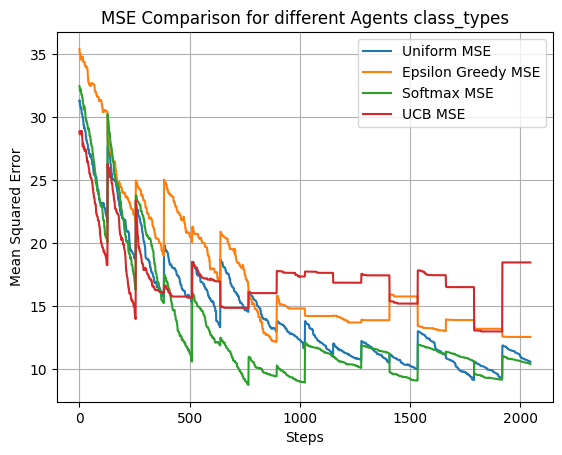

In [1]:
from src.terrain import Terrain
from src.agent import Agent
from src.visualizer import Visualizer
import numpy as np

def calc_terrain_mse(terrain_truth, agent_truth, size_x, size_y):
    mu_values = np.array([[terrain_truth[i, j]["mu"] for j in range(size_y)] 
                      for i in range(size_x)])
    mean_values = np.array([[agent_truth[i, j]["mean"] for j in range(size_y)] 
                      for i in range(size_x)])
    return np.mean(abs(mu_values.flatten() - mean_values.flatten()) ** 2)

if __name__ == '__main__':
    N_TRIALS = 2048
    TERRAIN_SIDE_LENGTH = 16
    TRIALS_TIL_RESET = 128
    terrain = Terrain(TERRAIN_SIDE_LENGTH, TERRAIN_SIDE_LENGTH)
    agents = [Agent(terrain, N_TRIALS, 'uniform'),
              Agent(terrain, N_TRIALS, 'epsilon_greedy'),
              Agent(terrain, N_TRIALS, 'softmax'),
              Agent(terrain, N_TRIALS, 'ucb')]

    agents_mse_terrain = []
    agents_performance = []
    visualizers = []
    for agent in agents:
        performance = []
        mse_terrain = []
        for curr_trial in range(N_TRIALS):
            if curr_trial % TRIALS_TIL_RESET == 0: # Bonus 2 => Resetting terrain every TRIALS_TIL_RESET trials
                terrain.generate_terrain()
            performance.append(agent.forward())
            mse_terrain.append(calc_terrain_mse(terrain.terrain, agent.local_terrain, TERRAIN_SIDE_LENGTH, TERRAIN_SIDE_LENGTH))
        
        agents_mse_terrain.append(mse_terrain)
        visualizers.append(Visualizer(agent))
        agents_performance.append(performance)
        #viz.draw_terrain_knowledge()
        #viz.draw_diff_agent_knowledge_ground_truth()
    
    Visualizer.draw_mse(agents_mse_terrain)

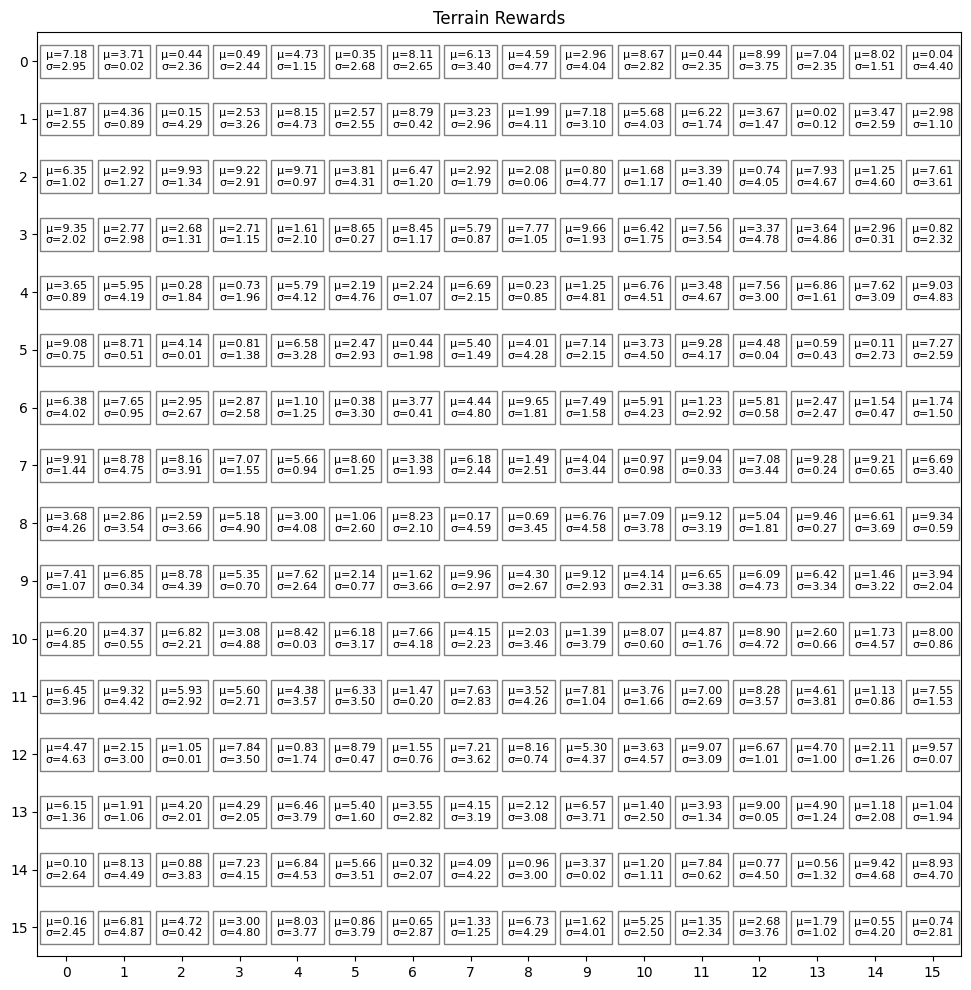

In [2]:
terrain.visualize()

---------- Uniform ----------


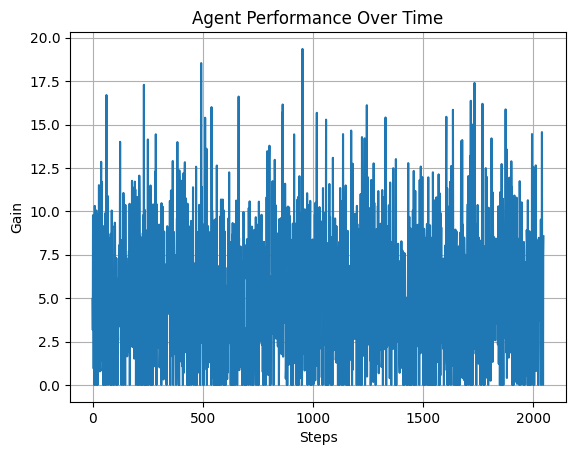

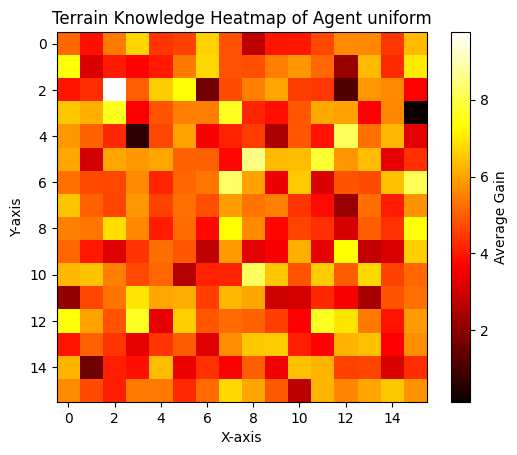

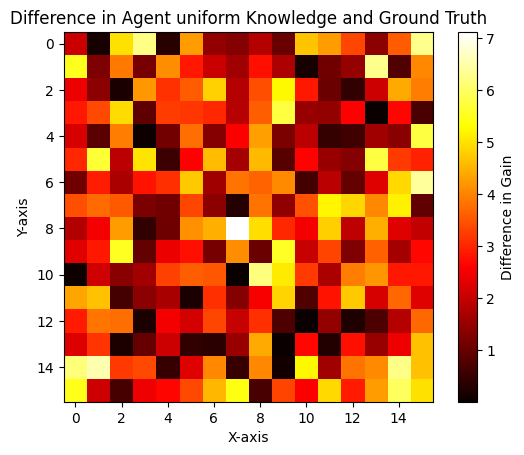

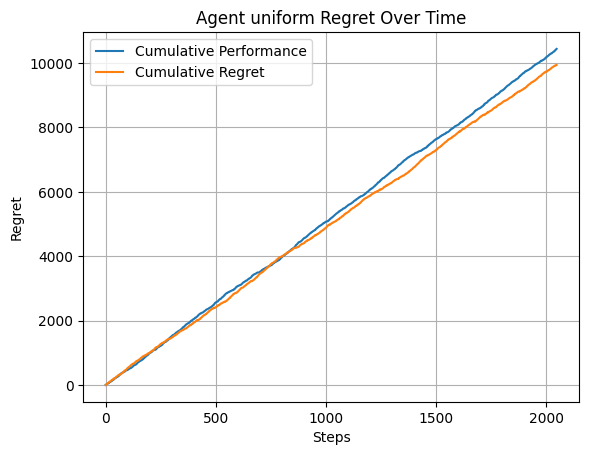

---------- Epsilon Greedy ----------


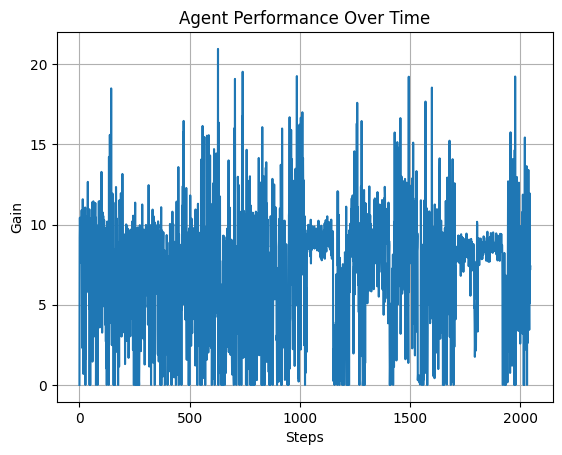

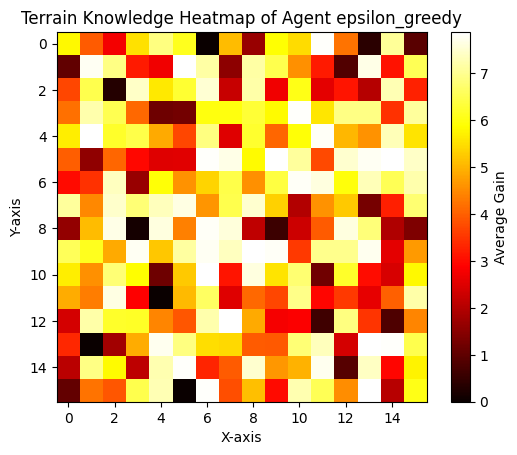

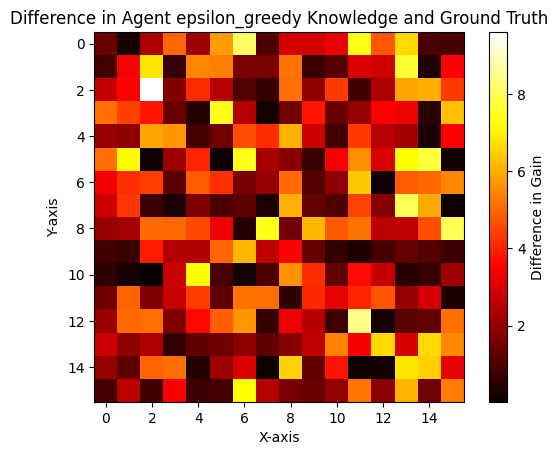

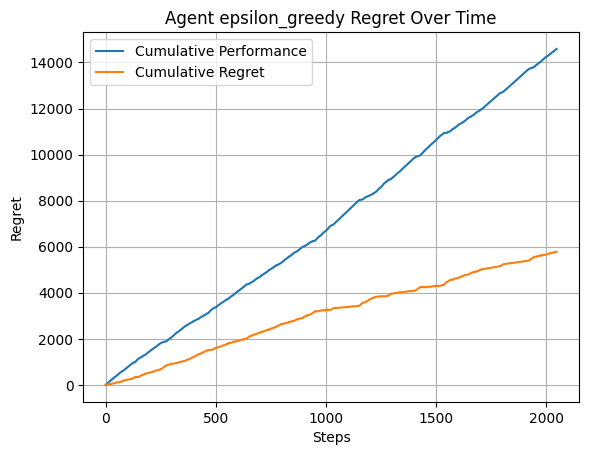

---------- Softmax ----------


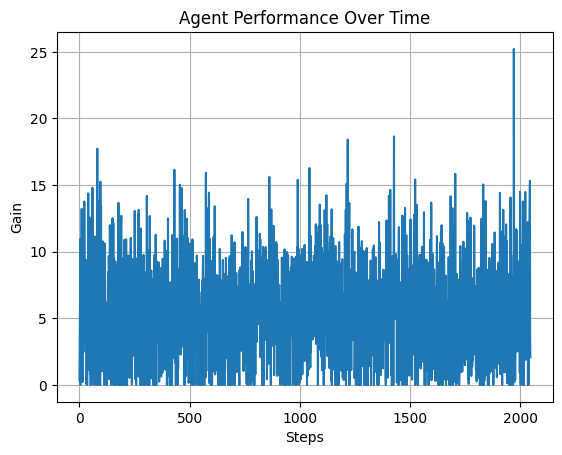

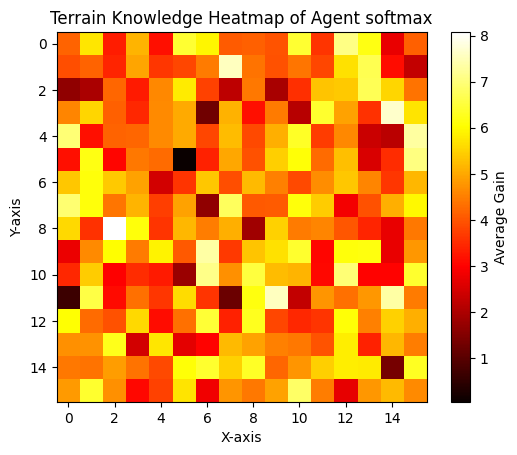

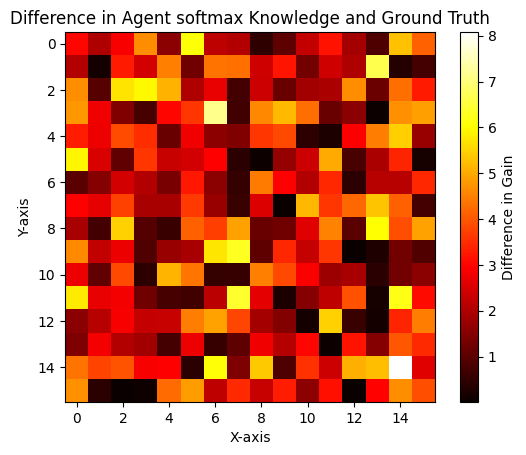

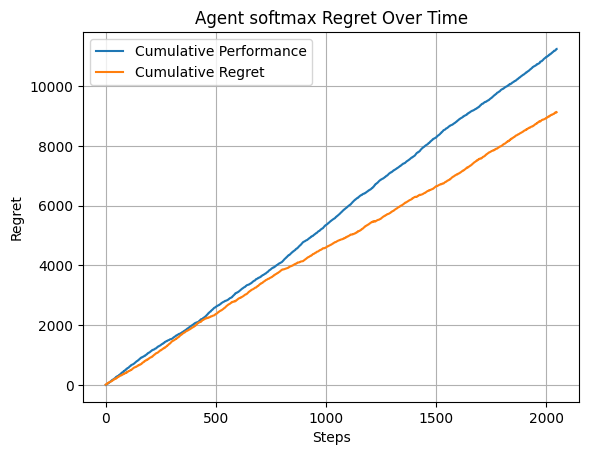

---------- UCB ----------


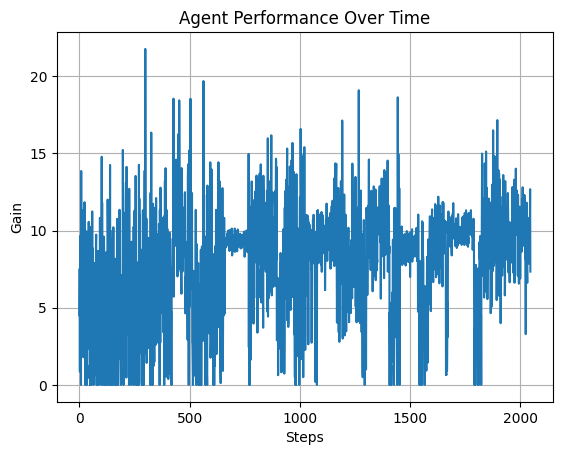

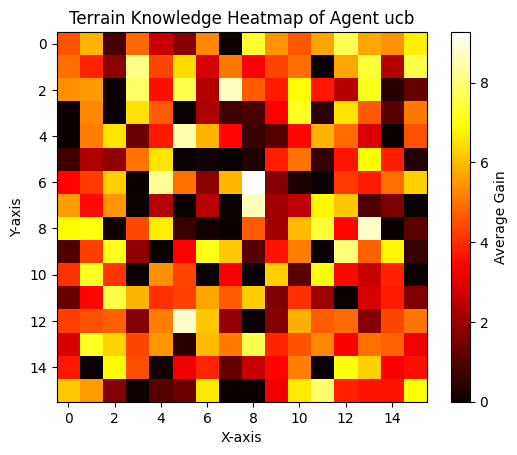

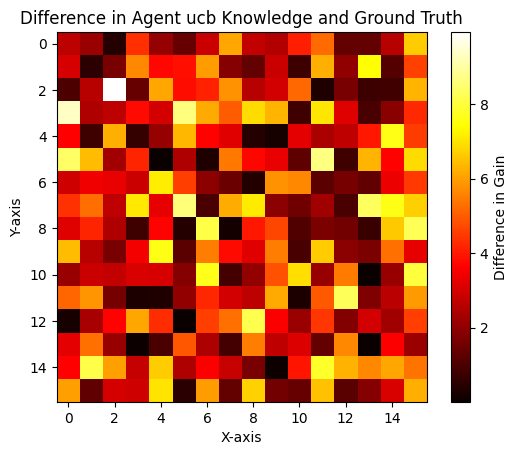

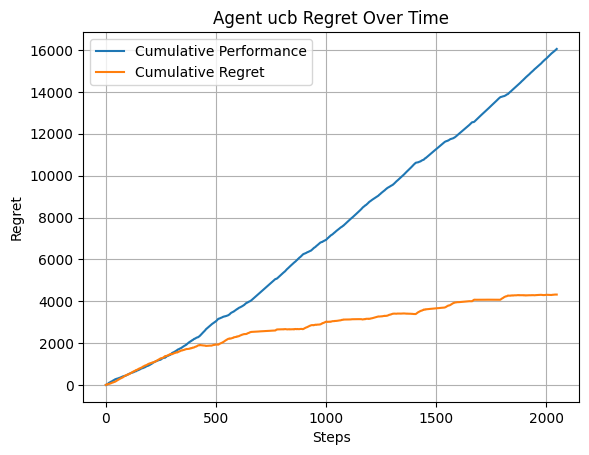

In [3]:
agents_labels = ['Uniform', 'Epsilon Greedy', 'Softmax', 'UCB']
for i, viz in enumerate(visualizers):
    print('-' * 10, agents_labels[i], '-' * 10)
    viz.plot_performance(agents_performance[i])
    viz.draw_terrain_knowledge()
    viz.draw_diff_agent_knowledge_ground_truth()
    viz.draw_regret(agents_performance[i])
    
    

## Bonus 1

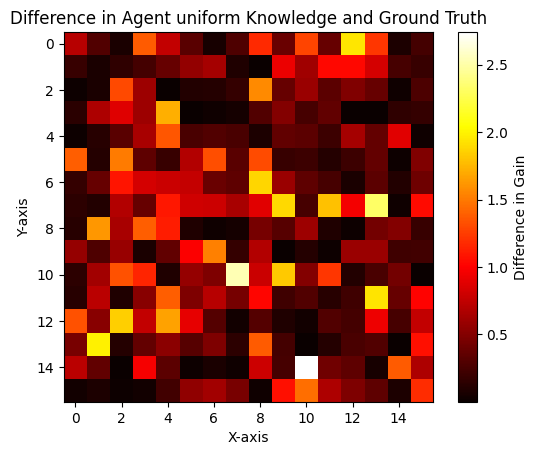

In [7]:
from src.local_terrain import LocalTerrain

loc_ter = LocalTerrain(TERRAIN_SIDE_LENGTH, TERRAIN_SIDE_LENGTH)
agents = [Agent(terrain, N_TRIALS, 'uniform', local_terrain=loc_ter),
          Agent(terrain, N_TRIALS, 'epsilon_greedy', local_terrain=loc_ter),
          Agent(terrain, N_TRIALS, 'softmax', local_terrain=loc_ter),
          Agent(terrain, N_TRIALS, 'ucb', local_terrain=loc_ter)]


for curr_trial in range(N_TRIALS):
    #if curr_trial % TRIALS_TIL_RESET == 0: # Bonus 2 => Resetting terrain every TRIALS_TIL_RESET trials
    #    terrain.generate_terrain()
    for agent in agents:
        performance.append(agent.forward())
        mse_terrain.append(calc_terrain_mse(terrain.terrain, agent.local_terrain, TERRAIN_SIDE_LENGTH, TERRAIN_SIDE_LENGTH))

global_viz = Visualizer(agents[0])
global_viz.draw_diff_agent_knowledge_ground_truth()